In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio  # Soundcard audio I/O access library
import wave  # Python 3 module for reading / writing simple .wav files
from scipy.signal import butter, lfilter
from scipy.io import wavfile

FORMAT = pyaudio.paInt16  # data type formate
CHANNELS = 1  # Adjust to your number of channels
RATE = 44100  # Sample Rate

CHUNK = 512  # Block Size
RECORD_SECONDS = 10  # Record time
WAVE_OUTPUT_FILENAME = "file3.wav"

# Startup pyaudio instance
audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)
print("recording...")
frames = []

# print(int(RATE / CHUNK * RECORD_SECONDS))
print()
# Record for RECORD_SECONDS
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")

# Stop Recording
stream.stop_stream()
stream.close()
audio.terminate()

waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()
# Finished Recording Procedure


#    Opening Wav file for Plotting 

spf = wave.open("file3.wav", "r")

# Extract Raw Audio from Wav File
data = spf.readframes(-1)
data = np.frombuffer(signal, dtype=np.int16)

recording...

finished recording


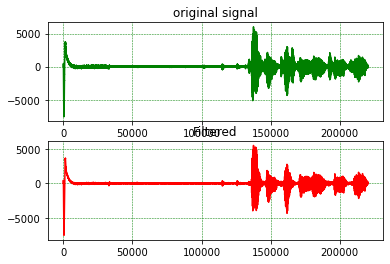

In [14]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 2 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 44100  # sample rate, Hz
cutoff = 8000  # desired cutoff frequency of the filter, Hz

y = butter_lowpass_filter(data, cutoff, fs, order)
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

plt.figure()
plt.subplot(211)
plt.plot(signal, color='green')
plt.grid(color='green', linestyle='--', linewidth=0.5)
plt.title('original signal')

plt.subplot(212)
plt.plot(y, color='red')
plt.title('Filtered')
plt.grid(color='green', linestyle='--', linewidth=0.5)
plt.show(block=True)

In [37]:
from scipy.io import wavfile
import numpy as np

fs, data = wavfile.read('file3.wav')

upsample_factor = 2
upsampled_data = np.zeros(upsample_factor*len(data))
upsampled_data[::2] = data.copy()
upsampled_data = upsampled_data.astype(np.int16)

wavfile.write('upsampled_data.wav', RATE, upsampled_data)

low_pass_filtered_upsampled_data = butter_lowpass_filter(upsampled_data, cutoff, fs, order)
low_pass_filtered_upsampled_data = low_pass_filtered_upsampled_data.astype(np.int16)
wavfile.write('low_pass_filtered_upsampled_data.wav', RATE, low_pass_filtered_upsampled_data)

wavfile.write('data.wav', RATE, data)



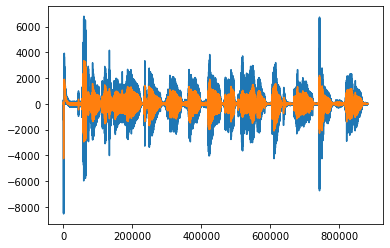

In [44]:
plt.plot(upsampled_data)
plt.plot(low_pass_filtered_upsampled_data)